# Multiclass Classification - Wheat Seeds

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Sample

In [2]:
# Source: https://raw.githubusercontent.com/jbrownlee/Datasets/master/wheat-seeds.csv

In [3]:
with open("wheat-seeds.names.txt","r") as f:
    print(f.read())

Wheat Seeds Dataset

Source:

MaÃ…â€šgorzata Charytanowicz, Jerzy Niewczas
Institute of Mathematics and Computer Science,
The John Paul II Catholic University of Lublin, KonstantynÃƒÂ³w 1 H,
PL 20-708 Lublin, Poland
e-mail: {mchmat,jniewczas}@kul.lublin.pl

Piotr Kulczycki, Piotr A. Kowalski, Szymon Lukasik, Slawomir Zak
Department of Automatic Control and Information Technology,
Cracow University of Technology, Warszawska 24, PL 31-155 Cracow, Poland
and
Systems Research Institute, Polish Academy of Sciences, Newelska 6,
PL 01-447 Warsaw, Poland
e-mail: {kulczycki,pakowal,slukasik,slzak}@ibspan.waw.pl


Data Set Information:

The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for
the experiment. High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques

In [4]:
df = pd.read_csv("wheat-seeds.csv",header=None)
df.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [5]:
df.columns = ["Area","Perimeter","Compactness","Length of Kernel","Width of Kernel","Asymmetry Coefficient","Length of Kernel Groove","Varieties of Wheat"]
df.head()

,Area,Perimeter,Compactness,Length of Kernel,Width of Kernel,Asymmetry Coefficient,Length of Kernel Groove,Varieties of Wheat
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


### Exploratory Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Area                     210 non-null    float64
 1   Perimeter                210 non-null    float64
 2   Compactness              210 non-null    float64
 3   Length of Kernel         210 non-null    float64
 4   Width of Kernel          210 non-null    float64
 5   Asymmetry Coefficient    210 non-null    float64
 6   Length of Kernel Groove  210 non-null    float64
 7   Varieties of Wheat       210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Area,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
Perimeter,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
Compactness,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
Length of Kernel,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
Width of Kernel,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
Asymmetry Coefficient,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
Length of Kernel Groove,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500
Varieties of Wheat,210.0,2.000000,0.818448,1.0000,1.00000,2.00000,3.000000,3.0000


In [8]:
df["Varieties of Wheat"].value_counts()

1    70
2    70
3    70
Name: Varieties of Wheat, dtype: int64

### Visualization

<AxesSubplot:xlabel='Varieties of Wheat', ylabel='count'>

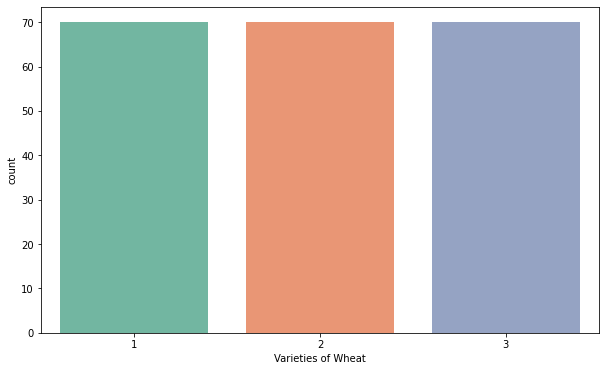

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(x=df["Varieties of Wheat"],palette="Set2")

<AxesSubplot:>

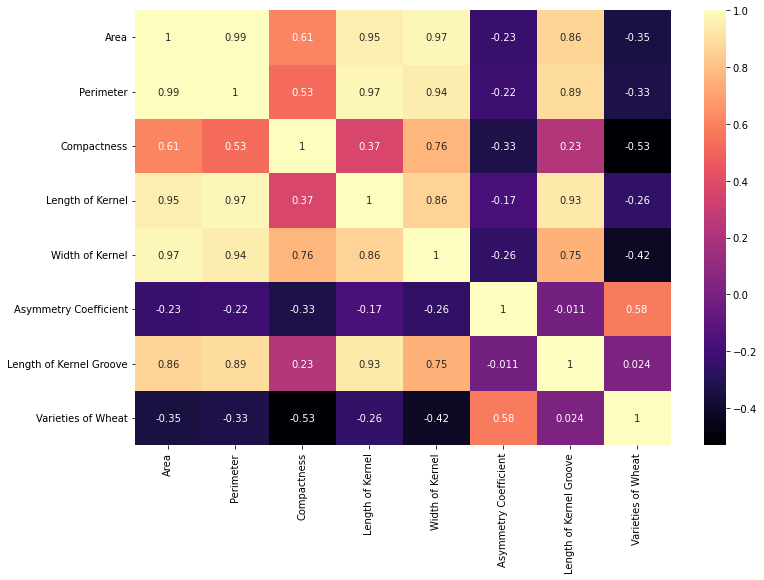

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(data=df.corr(),annot=True,cmap="magma")

### Train-Test Split

In [11]:
X = df.drop("Varieties of Wheat",axis=1)
y = df["Varieties of Wheat"]

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

### Scaling

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### Multiclass Logistic Regression Model

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
log_model = LogisticRegression(solver="saga",max_iter=10000,multi_class="ovr")

GridSearchCV for Best Hyperparameters

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
parameters = {"penalty":["l1","l2","elasticnet"],
              "C":np.logspace(0,10,30),
              "l1_ratio":np.linspace(0,1,30)}

In [21]:
grid_model = GridSearchCV(estimator=log_model,
                          param_grid=parameters,
                          cv=5)

If you run the code below, it'll return some warnings. Essentially, it's just trying to tell you that some combinations don't work. For example, the l1_ratio parameter is only used when the penalty is elasticnet. When it's used with other penalties, it will tell you that it won't work. You don't have to worry about the warnings and can ignore them.

In [1]:
# grid_model.fit(scaled_X_train,y_train)

In [23]:
grid_model.best_params_

{'C': 10.826367338740546,
 'l1_ratio': 0.896551724137931,
 'penalty': 'elasticnet'}

### Performance Evaluation

In [24]:
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix,classification_report,roc_curve,auc

In [25]:
predictions = grid_model.predict(scaled_X_test)

Accuracy

In [26]:
accuracy_score(y_test,predictions)

1.0

Plot Confusion Matrix

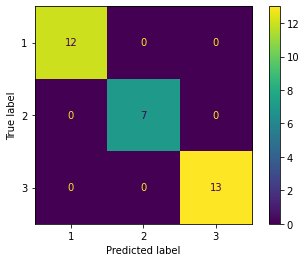

In [27]:
plot_confusion_matrix(grid_model,scaled_X_test,y_test)

Classification Report

In [28]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00        13

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



Curves and AUC

In [29]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

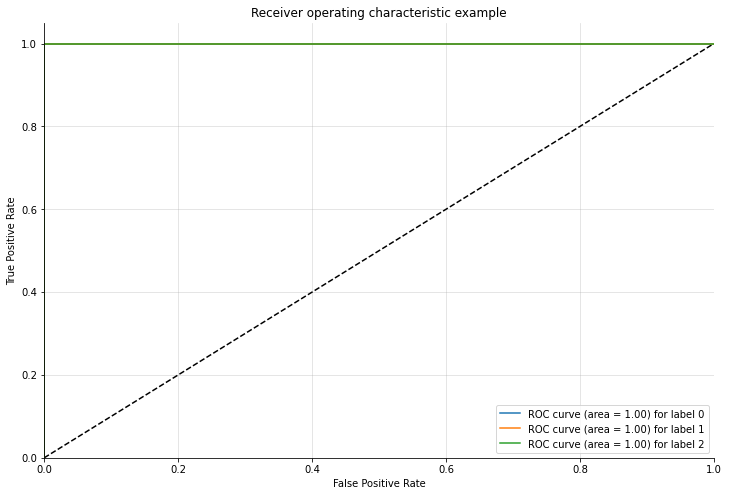

In [30]:
plot_multiclass_roc(grid_model,scaled_X_test,y_test,n_classes=3,figsize=(12,8))

### Final Model

In [33]:
final_model = LogisticRegression(penalty="elasticnet",
                                 C=10.826367338740546,
                                 solver="saga",
                                 max_iter=10000,
                                 multi_class="ovr",
                                 l1_ratio=0.896551724137931)

In [34]:
final_model.fit(X,y)

LogisticRegression(C=10.826367338740546, l1_ratio=0.896551724137931,
                   max_iter=10000, multi_class='ovr', penalty='elasticnet',
                   solver='saga')

Coefficients

In [35]:
final_model.coef_

array([[ -0.92166951,   3.60639109,   0.        ,   5.69215872,
          0.89796733,  -0.91145393, -13.27915433],
       [  3.99495775,  -4.32908946,  -1.1547979 ,  -4.31743664,
         -3.65553119,   0.65058723,   7.08461756],
       [ -3.50342617,   0.74811791,   0.03771225,  -0.49164079,
          0.9279241 ,   1.1969426 ,   5.86017618]])

In [38]:
coef_barplot = pd.DataFrame(final_model.coef_)
coef_barplot.columns = ["Area","Perimeter","Compactness","Length of Kernel","Width of Kernel","Asymmetry Coefficient","Length of Kernel Groove"]
coef_barplot

,Area,Perimeter,Compactness,Length of Kernel,Width of Kernel,Asymmetry Coefficient,Length of Kernel Groove
0,-0.921670,3.606391,0.000000,5.692159,0.897967,-0.911454,-13.279154
1,3.994958,-4.329089,-1.154798,-4.317437,-3.655531,0.650587,7.084618
2,-3.503426,0.748118,0.037712,-0.491641,0.927924,1.196943,5.860176


Testing the Model

In [40]:
test = [[11.34,12.47,0.9091,5.123,3.947,7.129,4.674]]

In [41]:
final_model.predict(test)

array([3], dtype=int64)

In [42]:
final_model.predict_proba(test)

array([[1.70436575e-01, 2.84335487e-05, 8.29534991e-01]])

Saving the Model

In [44]:
from joblib import dump

In [45]:
dump(final_model,"wheat_seeds_model.joblib")

['wheat_seeds_model.joblib']